In [1]:
using LinearAlgebra, Plots

In [2]:
using DataFrames, CSV


In [3]:
function GradDescent(grad, init, stepsize, iters)
    cur = [init]
    for i in 1:iters
        push!(cur, cur[end] - stepsize(i) * grad(cur[end]...))
    end
    return cur
end
        

GradDescent (generic function with 1 method)

In [4]:
L(w, data) = prod(1/(1 + exp(-data[i][2] * w'data[i][1])) for i = 1:length(data))

L (generic function with 1 method)

In [5]:
data = (([4,5,6],1),([-4,5,6],1))

(([4, 5, 6], 1), ([-4, 5, 6], 1))

In [6]:
w = [3,4,5]

3-element Vector{Int64}:
 3
 4
 5

In [7]:
data[1][1]

3-element Vector{Int64}:
 4
 5
 6

In [8]:
L(w,data)

1.0

In [9]:
Lgrad(w,data) = (-data[2]*data[1])/(1 + exp(-data[2] * w'data[1]))

Lgrad (generic function with 1 method)

In [10]:
function SGD(grad, init, stepsize, iters, data)
    cur = [init]
    for i in 1:iters
        j = rand(1:length(data))
        push!(cur, cur[end] - stepsize(i) * grad(cur[end], data[j]))
    end
    return cur
end
        

SGD (generic function with 1 method)

In [11]:
SGD(Lgrad, [1.0,1,1,1], x->.01, 100, datalist)

LoadError: UndefVarError: `datalist` not defined

In [12]:
L([3.485993945569559, 2.6939958865287883, 1.7399979917259305, 1.1199997076760586], datalist)

LoadError: UndefVarError: `datalist` not defined

In [13]:
L([5.0, 1.0, 1.0, 1.0], datalist)

LoadError: UndefVarError: `datalist` not defined

In [14]:
grad(w,data)

LoadError: UndefVarError: `grad` not defined

In [15]:
iris = CSV.read("../../Datasets/iris/iris.data", header=0, DataFrame);


In [16]:
part1=iris[1:100,:]
part2=iris[51:150,:]
part3=vcat(iris[1:50,:],iris[101:150,:])

Row,Column1,Column2,Column3,Column4,Column5
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [17]:
function datafypartition(part)
    partM = Matrix(part)
    datapiece = []
    word1=partM[1,end]
    word2=partM[end,end]
    for i in 1:length(partM[:,1])
        push!(datapiece, (partM[i, 1:end-1], partM[i,end] == word1 ? 1 : -1))
    end
    return datapiece
end
    

datafypartition (generic function with 1 method)

In [18]:
datalist=datafypartition(part2)

100-element Vector{Any}:
 (Any[7.0, 3.2, 4.7, 1.4], 1)
 (Any[6.4, 3.2, 4.5, 1.5], 1)
 (Any[6.9, 3.1, 4.9, 1.5], 1)
 (Any[5.5, 2.3, 4.0, 1.3], 1)
 (Any[6.5, 2.8, 4.6, 1.5], 1)
 (Any[5.7, 2.8, 4.5, 1.3], 1)
 (Any[6.3, 3.3, 4.7, 1.6], 1)
 (Any[4.9, 2.4, 3.3, 1.0], 1)
 (Any[6.6, 2.9, 4.6, 1.3], 1)
 (Any[5.2, 2.7, 3.9, 1.4], 1)
 (Any[5.0, 2.0, 3.5, 1.0], 1)
 (Any[5.9, 3.0, 4.2, 1.5], 1)
 (Any[6.0, 2.2, 4.0, 1.0], 1)
 ⋮
 (Any[6.0, 3.0, 4.8, 1.8], -1)
 (Any[6.9, 3.1, 5.4, 2.1], -1)
 (Any[6.7, 3.1, 5.6, 2.4], -1)
 (Any[6.9, 3.1, 5.1, 2.3], -1)
 (Any[5.8, 2.7, 5.1, 1.9], -1)
 (Any[6.8, 3.2, 5.9, 2.3], -1)
 (Any[6.7, 3.3, 5.7, 2.5], -1)
 (Any[6.7, 3.0, 5.2, 2.3], -1)
 (Any[6.3, 2.5, 5.0, 1.9], -1)
 (Any[6.5, 3.0, 5.2, 2.0], -1)
 (Any[6.2, 3.4, 5.4, 2.3], -1)
 (Any[5.9, 3.0, 5.1, 1.8], -1)

In [19]:
size(part3)

(100, 5)

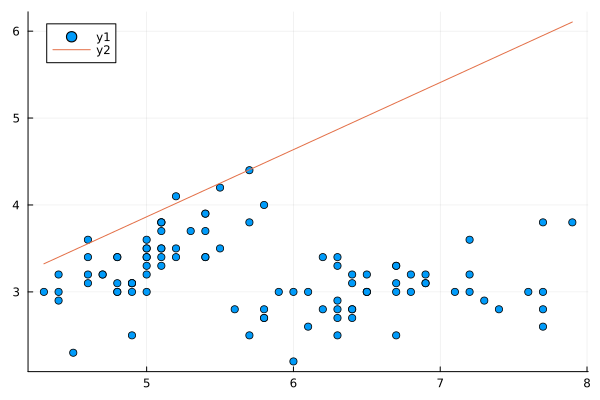

In [20]:
scatter(part3.Column1, part3.Column2)
plot!(x-> 1(2.6939958865287883 / 3.485993945569559) * x)

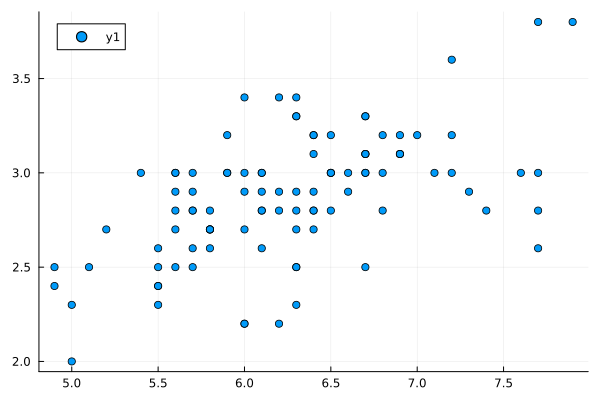

In [21]:
scatter(part2.Column1, part2.Column2)

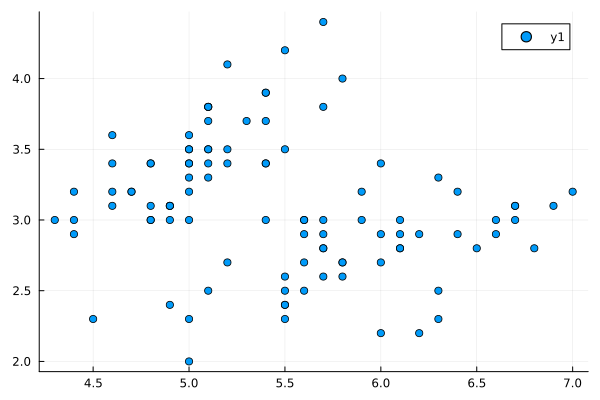

In [22]:
scatter(part1.Column1, part1.Column2)

In [23]:
iris

Row,Column1,Column2,Column3,Column4,Column5
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
